In [ ]:
## IEX EDA starts here

In [1]:
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
print(os.environ.get('IEX_SANDBOX_TOKEN'))
print(os.environ.get('IEX_TOKEN'))

Tsk_2f36139a7da4433bbc4882148386ff32
sk_adc1a33884d64226b0ad7b2e4a5f213e


In [3]:
base_url = 'https://cloud.iexapis.com/v1'
sandbox_url = 'https://sandbox.iexapis.com/stable'

token = os.environ.get('IEX_TOKEN')
sandbox_token = os.environ.get('IEX_SANDBOX_TOKEN')
params = {'token': token}
sandbox_params = {'token': sandbox_token}


In [37]:
# endpoint = '/stock/aapl/chart/36m'
# endpoint = '/stock/aapl/balance-sheet'
# endpoint = '/stock/aapl/financials'
# endpoint = '/time-series/reported_financials/AAPL/10-Q?last=2'
# endpoint = '/time-series'
# endpoint = '/stock/aapl/financials?period=quarter'

# endpoint = '/stock/aapl/price'
endpoint = '/stock/aapl/income/10-Q?last=1'
# resp = requests.get(base_url+endpoint, params = params)
resp = requests.get(sandbox_url+endpoint, params = sandbox_params)

In [25]:
resp.raise_for_status()
income = resp.json()

In [33]:
# df = pd.DataFrame(resp.json())
df

,close,high,low,open,symbol,volume,id,key,subkey,date,...,uLow,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent
0,36.4291,38.3980,36.2800,37.7001,AAPL,77847797,_ILOSICTHEPCRRSAI,LPAA,,2017-06-22,...,147.9647,19106554,35.5370,35.9643,35.1325,35.5594,77706168,"Jun 22, 17",0.000000,0.0000
1,38.1800,38.1800,37.7235,37.9102,AAPL,144333002,ACSORPRIHIELCTIS_,AALP,,2017-06-23,...,146.9000,36016766,35.5229,35.1776,35.5580,34.8320,148721808,"Jun 23, 17",0.169320,0.0047
2,37.5660,38.2758,37.5660,38.2758,AAPL,103745046,RLAPTIREI_OSISCCH,LPAA,,2017-06-26,...,148.3000,25801256,36.6212,36.3677,36.7658,34.7913,105882717,"Jun 26, 17",-0.119185,-0.0031
3,36.2965,37.8100,36.2965,36.6339,AAPL,102259704,IOLISTHCIRSEA_CPR,AALP,,2017-06-27,...,147.8600,25366772,35.8933,35.8363,34.8565,34.7272,103726021,"Jun 27, 17",-0.542277,-0.0149
4,38.1741,38.1741,36.5800,37.0997,AAPL,90494140,ITRSIAHCISLPEO_CR,PALA,,2017-06-28,...,144.8866,22269885,34.6496,36.0209,35.0901,34.5802,92637163,"Jun 28, 17",0.537765,0.0147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,135.1200,135.1200,129.9600,129.9600,AAPL,65058825,_RICSRHTSIAICOELP,PALA,,2021-06-15,...,133.7300,64316043,136.1500,130.4300,132.5000,132.5200,64963430,"Jun 15, 21",-0.863989,-0.0065
1001,131.8500,133.6000,131.8500,132.0600,AAPL,94257225,_RRCASPSTOILICEHI,LAAP,,2021-06-16,...,132.0780,96133057,131.2400,133.3300,134.5100,131.0150,94952390,"Jun 16, 21",0.510310,0.0041
1002,134.6000,137.1000,131.0000,131.0000,AAPL,97091492,SRCHOAESICR_IPTIL,AAPL,,2021-06-17,...,131.8000,96903822,135.8000,133.7100,137.3700,132.2300,100656498,"Jun 17, 21",1.683184,0.0127
1003,133.7300,133.7300,133.1400,133.1400,AAPL,111527502,IECLSISI_RTCHRPAO,APAL,,2021-06-18,...,132.4800,113467938,132.0400,132.6100,133.7100,132.7600,108963350,"Jun 18, 21",-1.379449,-0.0105


In [38]:
rev = []
rev_qrt = {}

for num in range(0,len(income['income'])):
    for key in ('fiscalDate','fiscalQuarter','totalRevenue'):
        rev_qrt[key] = income['income'][num].setdefault(key)
    rev.append(rev_qrt)
    rev_qrt = {}



TypeError: list indices must be integers or slices, not str

In [102]:
# rev is a list of dict
# TODO
# add TTM_Revenue
for i in range(len(rev)):
    if (i+3) < len(rev):
        rev[i]['TTM_Revenue'] = rev[i]['totalRevenue'] + rev[i+1]['totalRevenue'] + rev[i+2]['totalRevenue'] + rev[i+3]['totalRevenue']
        
# rev_df = pd.DataFrame(rev)    
# # rename totalRevenue to Quarterly_Revenue
# rev_df = rev_df.rename(columns={'totalRevenue': 'Quarterly_Revenue'})
# rev_df

In [16]:
# If you plan to use this same endpoint a few times, it makes sense to create a function to avoid repeating code. Here is an example:

In [164]:
# param definitions
base_url = 'https://cloud.iexapis.com/v1'
sandbox_url = 'https://sandbox.iexapis.com/stable'

token = os.environ.get('IEX_TOKEN')
sandbox_token = os.environ.get('IEX_SANDBOX_TOKEN')
params = {'token': token}
sandbox_params = {'token': sandbox_token}
    
def revenue_history(_symbol, _params, _last=None):
    # _last defaul is 1; max is 12 (quarters)
    endpoint = f'{sandbox_url}/stock/{_symbol}/income/10-Q'
    if _last:
        endpoint += f'/?last={_last}'
    
    resp = requests.get(endpoint, params=_params)
    resp.raise_for_status()
    resp = resp.json()
    
    rev = []
    rev_qrt = {}
    
    # extract date/quarter/quarterly revenue
    for num in range(0,len(resp['income'])):
        for key in ('fiscalDate','fiscalQuarter','totalRevenue'):
            rev_qrt[key] = resp['income'][num].setdefault(key)
        rev.append(rev_qrt)
        rev_qrt = {}
    
    # add TTM_Revenue
    # the last 3 TTM Revenue would not be available
    for i in range(0,len(rev)):
        if (i+3) < len(rev):
            rev[i]['TTM_Revenue'] = rev[i]['totalRevenue'] + rev[i+1]['totalRevenue'] + rev[i+2]['totalRevenue'] + rev[i+3]['totalRevenue']

    # Calculate quarterly & yearly revenue growth
    q=0
    y=0
    while q < 8:
        rev[q]['Quarterly_Revenue_Growth'] = round((rev[q]['totalRevenue']/rev[q+4]['totalRevenue']-1)*100,2)
        q += 1
    while y < 5:    
        rev[y]['TTM_Revenue_Growth'] = round((rev[y]['TTM_Revenue']/rev[y+4]['TTM_Revenue']-1)*100,2)
        y += 1
    
    # Convert to pandas DF
    rev_df = pd.DataFrame(rev)    
    # rename totalRevenue to Quarterly_Revenue
    rev_df = rev_df.rename(columns={'totalRevenue': 'Quarterly_Revenue'})
    # remove df rows where quarterly_revenue_growth is NaN
    rev_df = rev_df.loc[0:7]
    # use datetime format and sort df by date
    rev_df['fiscalDate'] = pd.to_datetime(rev_df['fiscalDate'], format='%Y/%m/%d')
    rev_df = rev_df.sort_values('fiscalDate')
    # transform date to year-month format
    rev_df["date_yrmo"] = rev_df['fiscalDate'].dt.strftime('%Y-%m')
    
    # calculate average monthly stock price 
    # only use relevant data
    endpoint = f'{sandbox_url}/stock/{_symbol}/chart/27m'
#     endpoint = '/stock/aapl/chart/27m'
    resp = requests.get(endpoint, params=_params)
    resp.raise_for_status()
    df = pd.DataFrame(resp.json())
    df = df[["symbol","date","close","fVolume"]]
    # transform date to year-month format
    df["date"] = pd.to_datetime(df['date'], format='%Y/%m/%d')
    df["date_yrmo"] = df['date'].dt.strftime('%Y-%m')
    # average close price per month
    df1 = df.groupby('date_yrmo')['close'].mean().reset_index(name='avg_monthly_price')
    df1['avg_monthly_price'] = round(df1['avg_monthly_price'],2)
    df = pd.merge(df, df1, on='date_yrmo', how='left')
    # merge df
    rev_df = pd.merge(rev_df, df, on='date_yrmo', how='left')
    
    return rev_df

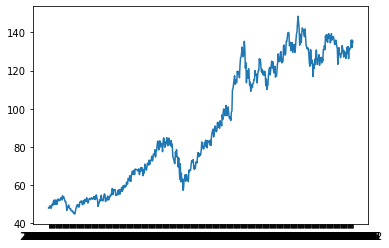

In [9]:
plt.plot(df['date'], df['close'], label = "Daily Close Price")

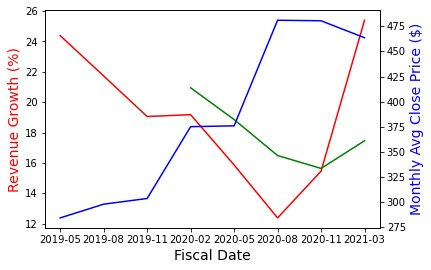

In [183]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(appl_rev_trend.date_yrmo, appl_rev_trend.Quarterly_Revenue_Growth, color="red")
ax.plot(appl_rev_trend.date_yrmo, appl_rev_trend.TTM_Revenue_Growth, color="green")
# set x-axis label
ax.set_xlabel("Fiscal Date",fontsize=14)
# set y-axis label
ax.set_ylabel("Revenue Growth (%)",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(appl_rev_trend.date_yrmo, appl_rev_trend["avg_monthly_price"],color="blue")
ax2.set_ylabel("Monthly Avg Close Price ($)",color="blue",fontsize=14)
# ax2.title('Short Term (3-month) vs Long Term (TTM) Revenue Growth')
ax2.tick_params(axis='x', which='major', labelsize=6)
plt.show()
# plt.title('Short Term (3-month) vs Long Term (TTM) Revenue Growth')
# plt.tick_params(axis='x', which='major', labelsize=6)
# show a legend on the plot
# plt.legend()
# save the plot as a file
# fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
#             format='jpeg',
#             dpi=100,
#             bbox_inches='tight')

    fiscalDate  fiscalQuarter  Quarterly_Revenue   TTM_Revenue  \
0   2019-05-22              2         2772021233  1.038433e+10   
1   2019-05-22              2         2772021233  1.038433e+10   
2   2019-05-22              2         2772021233  1.038433e+10   
3   2019-05-22              2         2772021233  1.038433e+10   
4   2019-05-22              2         2772021233  1.038433e+10   
..         ...            ...                ...           ...   
162 2021-03-04              1         3997567125  1.398112e+10   
163 2021-03-04              1         3997567125  1.398112e+10   
164 2021-03-04              1         3997567125  1.398112e+10   
165 2021-03-04              1         3997567125  1.398112e+10   
166 2021-03-04              1         3997567125  1.398112e+10   

     Quarterly_Revenue_Growth  TTM_Revenue_Growth date_yrmo symbol       date  \
0                       24.39                 NaN   2019-05   ADBE 2019-05-01   
1                       24.39                

AttributeError: 'Line2D' object has no property 'secondary_y'

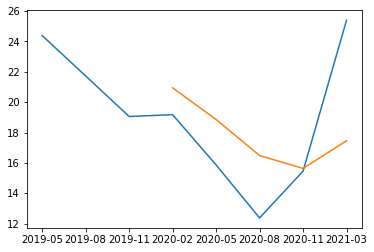

In [167]:
appl_rev_trend = revenue_history('adbe', sandbox_params, 12)
print(appl_rev_trend)
plt.plot(appl_rev_trend['date_yrmo'], appl_rev_trend['Quarterly_Revenue_Growth'], label = "3m Revenue Growth (%)")
plt.plot(appl_rev_trend['date_yrmo'], appl_rev_trend['TTM_Revenue_Growth'], label = "TTM Revenue Growth (%)")
plt.plot(appl_rev_trend['date_yrmo'], appl_rev_trend['avg_monthly_price'], secondary_y=True, label = "Monthly Avg Close Price ($)")
plt.xlabel('Fiscal Date')
plt.ylabel('Revenue Growth (%)')
plt.title('Short Term (3-month) vs Long Term (TTM) Revenue Growth')
plt.tick_params(axis='x', which='major', labelsize=6)
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

In [59]:
appl_rev_trend.sort_values('fiscalDate')

,fiscalDate,fiscalQuarter,Quarterly_Revenue,TTM_Revenue,Quarterly_Revenue_Growth,TTM_Revenue_Growth
7,2019-05-18,2,2857616761,1.041831e+10,25.27,NaN
6,2019-08-23,3,2844964117,1.088740e+10,19.74,NaN
5,2019-11-24,4,3023384337,1.138907e+10,19.89,NaN
4,2020-02-17,1,3097004061,1.182297e+10,16.29,20.13
3,2020-05-14,2,3143868758,1.210922e+10,10.02,16.23
2,2020-08-26,3,3367828835,1.263209e+10,18.38,16.02
1,2020-11-14,4,3495634463,1.310434e+10,15.62,15.06
0,2021-02-25,1,3972570687,1.397990e+10,28.27,18.24


In [149]:
# TODO
# calculate monthly average stock price
endpoint = '/stock/aapl/chart/27m'
resp = requests.get(sandbox_url+endpoint, params = sandbox_params)
resp.raise_for_status()
df = pd.DataFrame(resp.json())
# df.head()

In [151]:
# only use relevant data
df = df[["symbol","date","close","fVolume"]]
# transform date to year-month format
df["date"] = pd.to_datetime(df['date'], format='%Y/%m/%d')
df["date_yrmo"] = df['date'].dt.strftime('%Y-%m')
# calculate average close price per month
df1 = df.groupby('date_yrmo')['close'].mean().reset_index(name='Avg_price')
df = pd.merge(df, df1, on='date_yrmo', how='left')
df.head(50)

,symbol,date,close,fVolume,date_yrmo,Avg_price
0,AAPL,2019-03-25,48.5250,179609400,2019-03,48.294440
1,AAPL,2019-03-26,48.2044,202197553,2019-03,48.294440
2,AAPL,2019-03-27,48.7422,121620011,2019-03,48.294440
3,AAPL,2019-03-28,47.9400,84840906,2019-03,48.294440
4,AAPL,2019-03-29,48.0606,95378826,2019-03,48.294440
5,AAPL,2019-04-01,48.9400,114990372,2019-04,51.280595
6,AAPL,2019-04-02,49.0860,94398934,2019-04,51.280595
7,AAPL,2019-04-03,49.4178,94725048,2019-04,51.280595
8,AAPL,2019-04-04,49.2699,77901096,2019-04,51.280595
9,AAPL,2019-04-05,49.8300,75560436,2019-04,51.280595


In [138]:
df1

,date_yrmo,Avg_price
0,2019-03,48.144380
1,2019-04,51.496814
2,2019-05,49.178373
3,2019-06,49.529485
4,2019-07,52.446064
5,2019-08,52.681168
6,2019-09,55.594925
7,2019-10,60.068378
8,2019-11,67.171210
9,2019-12,70.690081


In [63]:
_memory=0

for i in df['date']:
    for j in appl_rev_trend['fiscalDate']:
        if pd.Timestamp(i) == pd.Timestamp(j):
            
        elif pd.Timestamp(i) == pd.Timestamp(j):
            
            print('yes')
        else:
            print('no')
    

In [67]:
df['close'][0:3].mean()

48.14006666666666

In [50]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral3

In [51]:
#make sure MSNDATE is a datetime format
appl_2qrt_df['fiscalDate'] = pd.to_datetime(appl_2qrt_df['fiscalDate'], format='%Y/%m/%d')
p = figure(x_axis_type='datetime')

p.line(x='fiscalDate', y='Quarterly_Revenue_Growth', line_width=2, source=appl_2qrt_df, legend='Quarterly_Revenue_Growth')
p.line(x='fiscalDate', y='TTM_Revenue_Growth', line_width=2, source=appl_2qrt_df, color=Spectral3[2], legend='TTM_Revenue_Growth')

p.yaxis.axis_label = '3-Month vs TTM Revenue'

show(p)

In [17]:
# def historical_data(_symbol, _range=None, _date=None):
#     endpoint = f'{base_url}/stock/{_symbol}/chart'
#     if _range:
#         endpoint += f'/{_range}'
#     elif _date:
#         endpoint += f'/date/{_date}'
    
#     resp = requests.get(endpoint, params=params)
#     resp.raise_for_status()
#     return pd.DataFrame(resp.json())

In [26]:
#appl_3m_df = historical_data('AAPL', _range='1m')